Problem statement : whether the person will heart attack or not  on the basis of various parameters

About the dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic


trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

output : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
sns.set(color_codes=True)
from numpy import std
%matplotlib inline 

In [ ]:
data = pd.read_csv('heart.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
data.isnull().sum() 

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data.chol.value_counts()

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

In [ ]:
data.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [ ]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

**DATA VISUALIZATIONS**

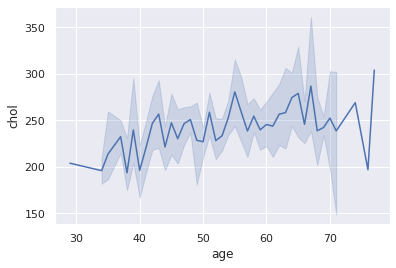

In [ ]:
sns.lineplot(x='age',y='chol',data=data )

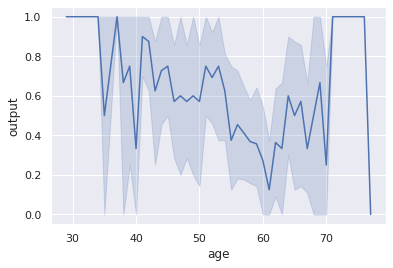

In [ ]:
sns.lineplot(x='age',y='output',data=data )

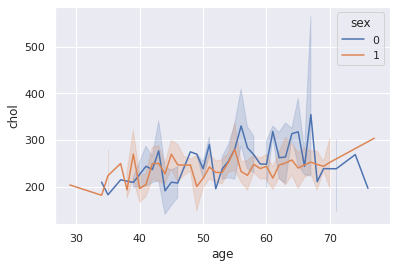

In [ ]:
sns.lineplot(x='age',y='chol',hue='sex',data=data ) #line plot to get condensed view of datapoints

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


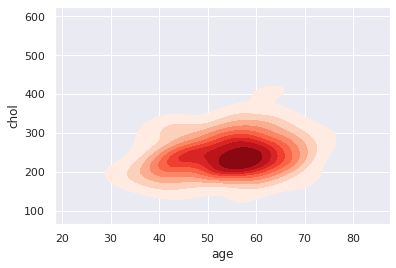

In [ ]:
k1=sns.kdeplot(data.age,data.chol,shade=True,shade_lowest=False,cmap='Reds')

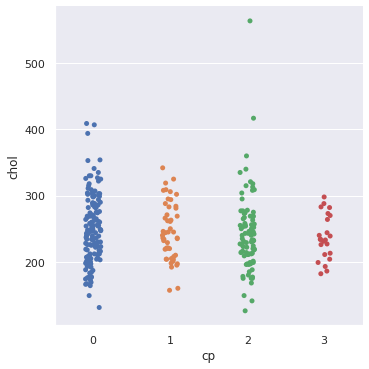

In [ ]:
sns.catplot(x='cp',y='chol',data=data)

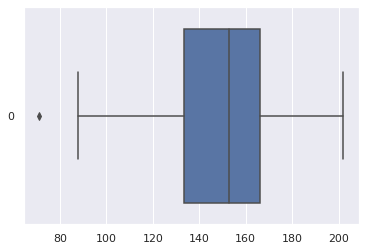

In [ ]:
sns.boxplot(data=data.thalachh,orient='h')

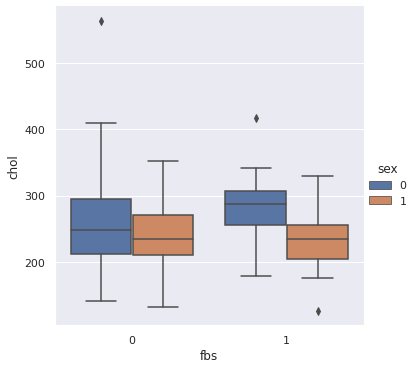

In [ ]:
g = sns.catplot(x="fbs", y="chol", hue="sex",data=data, kind="box",height=5, aspect=1)

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

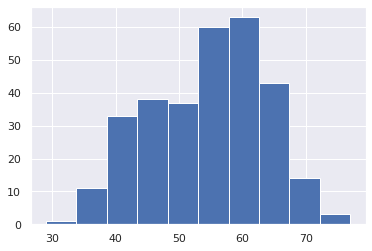

In [ ]:
plt.hist(data['age'])

(array([149.,  50.,  40.,  24.,  20.,  11.,   6.,   1.,   0.,   2.]),
 array([0.  , 0.62, 1.24, 1.86, 2.48, 3.1 , 3.72, 4.34, 4.96, 5.58, 6.2 ]),
 <a list of 10 Patch objects>)

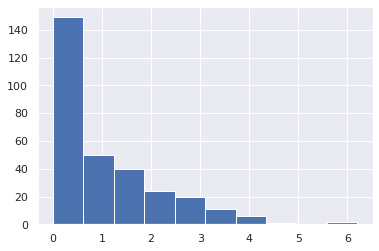

In [ ]:
plt.hist(data['oldpeak'])

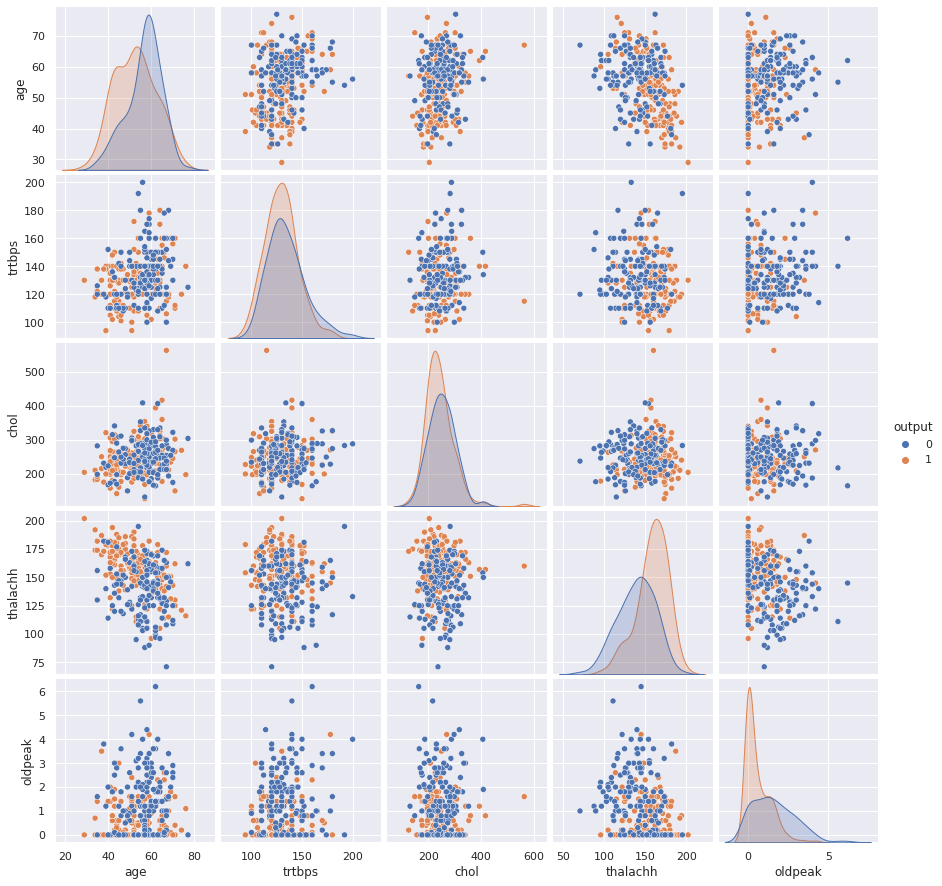

In [ ]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]
df_numeric= data.loc[:, numeric_list]
sns.pairplot(df_numeric, hue="output", diag_kind="kde")
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------
output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


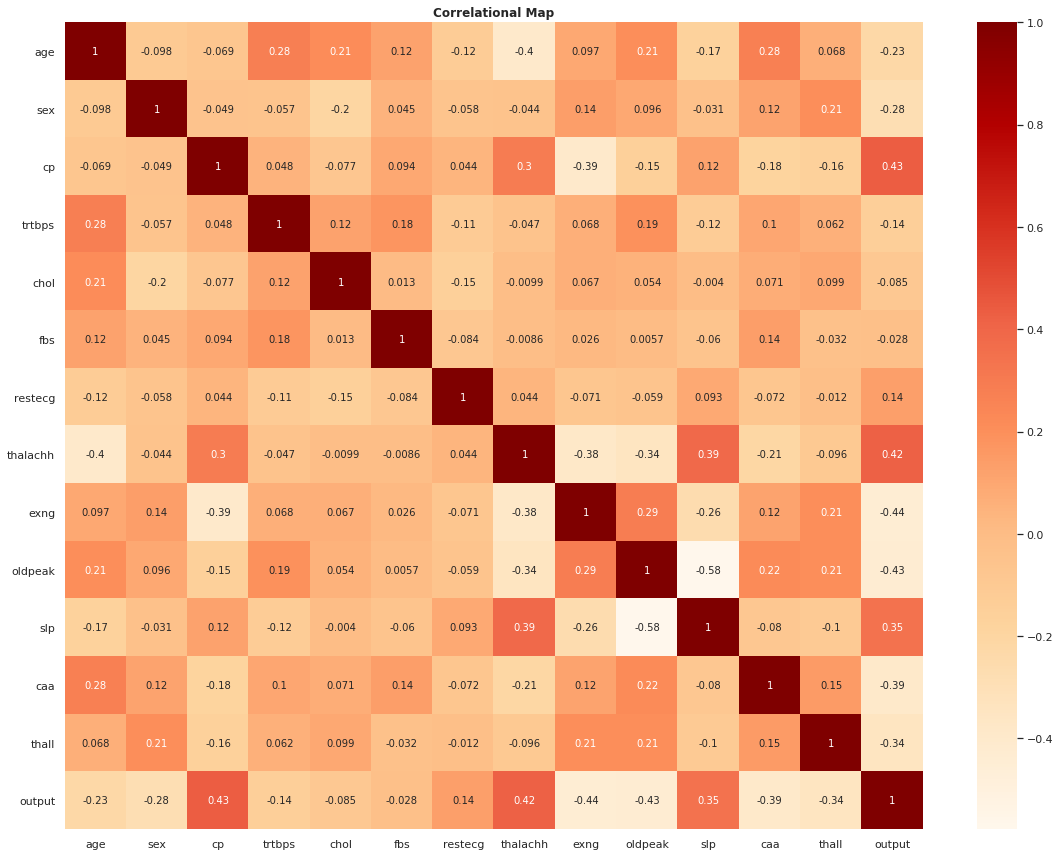

In [ ]:

plt.figure(figsize=(16,12))
sns.heatmap(data.corr(), annot=True, cmap='OrRd')
plt.title('Correlational Map', weight='bold')
print('---'*50)
print(data.corr().output.sort_values(ascending = False))
plt.tight_layout()

**MODELS**

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [ ]:
#spliting the train and test data in 60 to 40 percent ratio

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
#rescaling the features such that they have the properties of 
#a standard normal distribution with a mean of zero and a standard deviation of one.
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)


In [ ]:
X_train

array([[-1.45819851,  0.68669114, -0.94109156, ..., -0.75131448,
        -0.68725321,  1.17574773],
       [-0.19384435,  0.68669114,  0.07282256, ...,  0.94853453,
         0.34935372, -0.48683304],
       [ 1.17587265, -1.45625879,  1.08673668, ...,  0.94853453,
         0.34935372, -0.48683304],
       ...,
       [-2.61718982,  0.68669114,  0.07282256, ...,  0.94853453,
        -0.68725321, -0.48683304],
       [-0.2992072 ,  0.68669114, -0.94109156, ...,  0.94853453,
        -0.68725321,  1.17574773],
       [ 0.01688134,  0.68669114,  1.08673668, ...,  0.94853453,
        -0.68725321,  1.17574773]])

Model 1 : svm model

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
svm_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = svm_model.predict(X_test)

 model accuracy is  79.51 


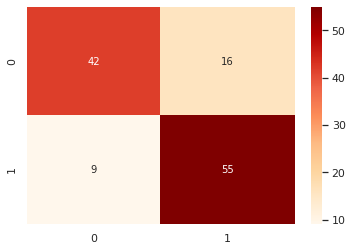

In [ ]:

from sklearn.metrics import accuracy_score 
 
from sklearn.metrics import confusion_matrix 

print(" model accuracy is  %0.2f "  %(accuracy_score(y_test, y_pred)*100))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='OrRd')


The linear svm model has the accuracy of 79.51%



Model 2: SVM using rbf kernal

In [ ]:

from sklearn import svm
clf = svm.SVC(kernel='rbf') # RBF Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

 model accuracy is  78.69 


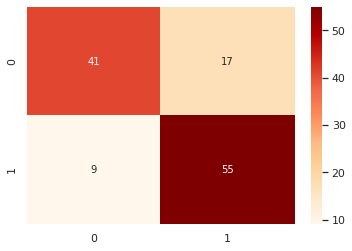

In [ ]:

from sklearn.metrics import accuracy_score 
 
from sklearn.metrics import confusion_matrix 

print(" model accuracy is  %0.2f "  %(accuracy_score(y_test, y_pred)*100))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='OrRd')


The rbf svm model has the accuracy of 76.23%



Model 3 : Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 

 model accuracy is  73.77 


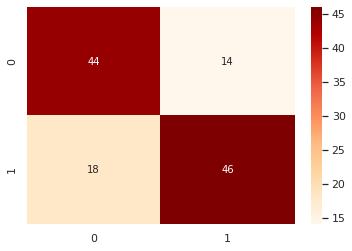

In [ ]:

from sklearn.metrics import accuracy_score 
 
from sklearn.metrics import confusion_matrix 

print(" model accuracy is  %0.2f "  %(accuracy_score(y_test, y_pred)*100))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='OrRd')

The accuracy of Naive bytes model is 73.77%

Model 4: Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression 

classifier1 = LogisticRegression(random_state = 1) 
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)

 model accuracy is  76.23 


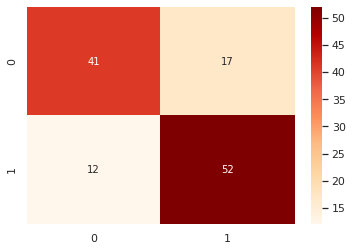

In [ ]:

from sklearn.metrics import accuracy_score 
 
from sklearn.metrics import confusion_matrix 

print(" model accuracy is  %0.2f "  %(accuracy_score(y_test, y_pred1)*100))
cm=confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, cmap='OrRd')

The accuracy of logistic regresiion model is 76.23%

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier1.predict(X_test)

 model accuracy is  76.23 


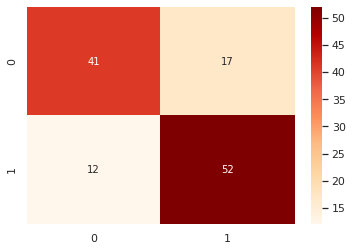

In [ ]:

from sklearn.metrics import accuracy_score 
 
from sklearn.metrics import confusion_matrix 

print(" model accuracy is  %0.2f "  %(accuracy_score(y_test, y_pred)*100))
cm=confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, cmap='OrRd')

Conclusion : The svm model with linear kernal has the most accuracy   of 79.51% and is the best model for prediction whether the person will have heartattack or not
